<a href="https://colab.research.google.com/github/olga-terekhova/tdsb-calendar/blob/main/Style_PDF_Calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# define input
filename = 'TDSB Calendar - September Landscape.pdf'

# define output
output_filename = 'TDSB Calendar - September Styled.pdf'

In [2]:
# install and import libraries
!pip install -q pymupdf

import pymupdf
from PIL import Image

In [3]:
# load page
doc = pymupdf.open(filename)
page = doc[0]

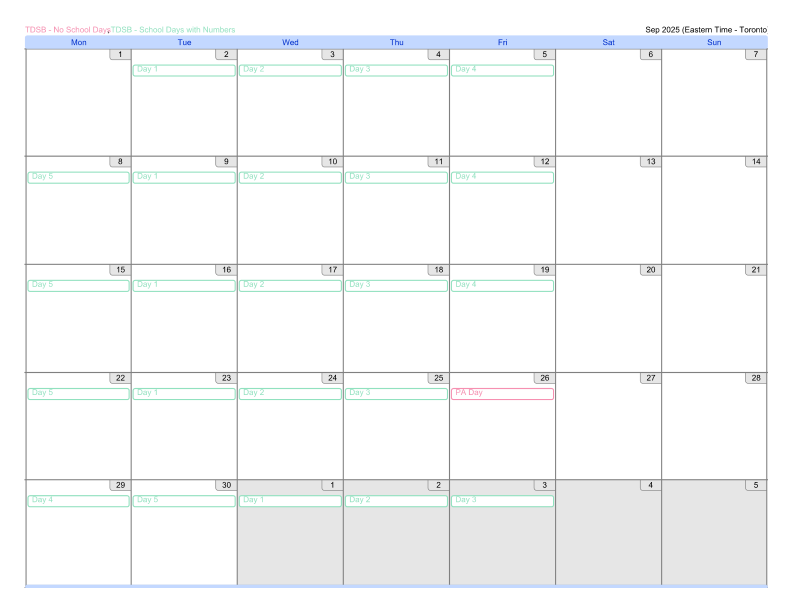

In [4]:
# render page preview
pix = page.get_pixmap()
pil_image = pix.pil_image()
pil_image

In [5]:
# draw overlay (remove calendar names)
rect = pymupdf.Rect(20, 20, 770, 34)
shape=page.new_shape()
shape.draw_rect(rect)
shape.finish(color=(1, 1, 1), fill=(1, 1, 1))
shape.commit()

In [6]:
# draw background (color weekends)

color_b = (1, 0.95, 0.95) # light red

rect_b = pymupdf.Rect(555, 40, 766, 479)
shape_b = page.new_shape()
shape_b.draw_rect(rect_b)
shape_b.finish(color=color_b, fill=color_b)
shape_b.commit(overlay = False)

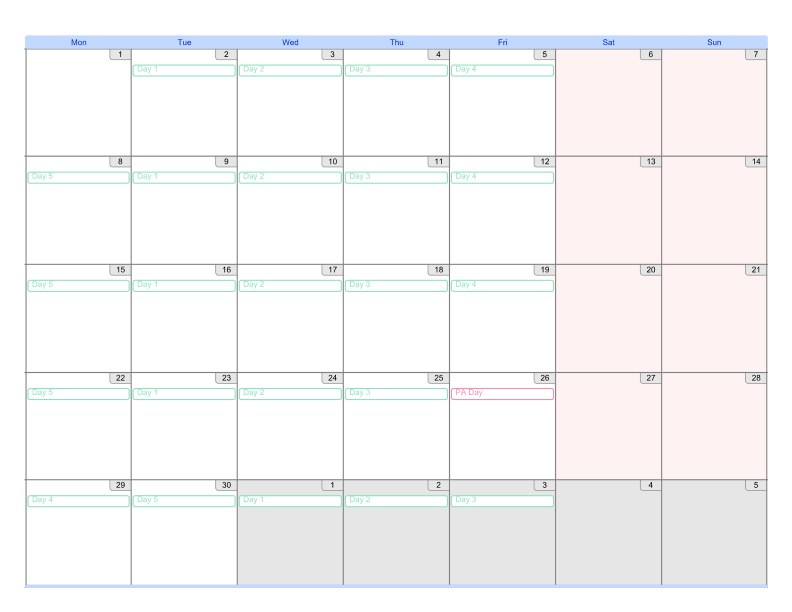

In [7]:
# render page preview
pix = page.get_pixmap()
pil_image = pix.pil_image()
pil_image

In [8]:
# get dimensions of the page
rect_o = page.rect
sw, sh = rect_o.width, rect_o.height
print(sw, sh)

# get scaled dimensions
scale = 0.9
sw_n, sh_n = sw * scale, sh * scale
print(sw_n, sh_n)

# define shift for the scaled page
top_margin = 50
left_margin = (sw - sw_n)/2

# get the dimensions of the scaled page
rect_n = pymupdf.Rect(0+left_margin, top_margin, sw_n+left_margin, sh_n+top_margin)

792.0 612.0
712.8000000000001 550.8000000000001


In [9]:
# create new doc and page
doc_new = pymupdf.open()
page_new = doc_new.new_page(width = sw, height = sh)

# render the previous page as a scaled image on the new page
page_new.show_pdf_page(rect_n, doc, 0)

6

In [10]:
# add picture

source_image = 'picture.png'
left_margin = 40
top_margin = -10
rect_p = pymupdf.Rect(0+left_margin, 0+top_margin, 192+left_margin, 128+top_margin)
page_new.insert_image(rect_p, filename = source_image)

9

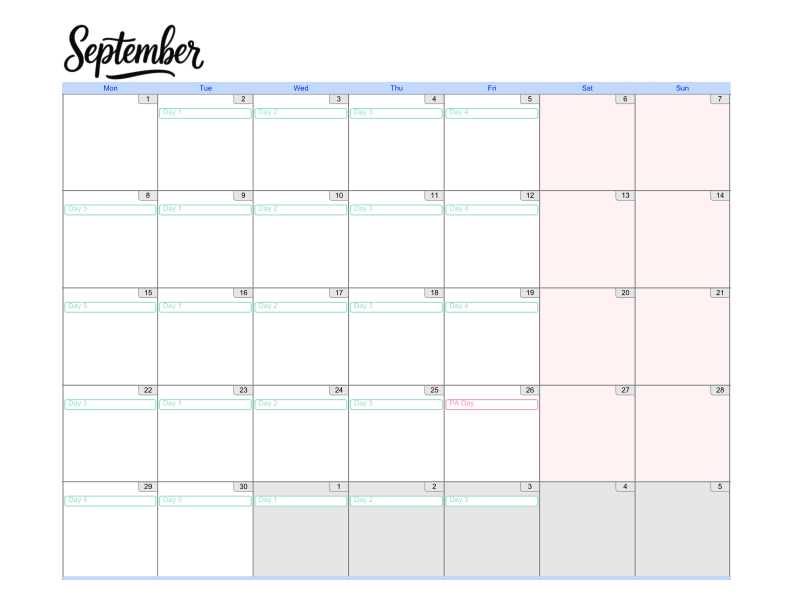

In [11]:
# render page preview
pix = page_new.get_pixmap()
pil_image = pix.pil_image()
pil_image

In [12]:
# save
doc_new.save(output_filename)